In [0]:
import pandas as pd
from sklearn import svm
import numpy as np

In [0]:
train_data = pd.read_csv("train.csv")
train_data.head()

,user_uuid,restaurant_uuid,discounted,area,cuisine,restaurant_features,Ratings
0,ae9a2bf4d42c67aed92df769580c0f3f30c9b823,4e8c86cfdb5034d208be316e876e885e0effa536,1,Sheikh Zayed,['Egyptian' 'Oriental' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Khorogat ...,1.0
1,c67a6eda67d18898729657a6c53fb21f01961fea,a23dd99b58683694a104fa68ccd08dffeb811556,0,New Cairo,['Egyptian' 'Koshary'],['Outdoor' 'TV' 'Drive-ins' 'Cheap Eats'],5.0
2,7438c2ffffa84ba1c1a2054b5d19fddd27d7ab09,fc508f4360b4a509edf10fe53d01d0d96ed7dbfc,0,Sheikh Zayed,['Egyptian' 'Grill'],['No Smoking Area' 'Casual Dining'],1.0
3,c5d0e5bb93e17ab698b04bb56229a2284e0d4e1b,8e9fd2e1d9da4d1b5e07a123a1ec7d7d915f28ec,0,Nasr City,['Pizza' 'Egyptian'],['Outdoor' '24 hrs'],3.0
4,23ce012715a4cf5bfed7f0821e461f1593f47027,c2e51bf525d2b2c7a33c3d8ee017914c6400e975,0,Mohandessin,['Egyptian' 'Fast Food'],['No Smoking Area'],5.0


In [0]:
train_data.shape

(64150, 7)

In [0]:
print(train_data.restaurant_uuid.value_counts().shape[0])
print(train_data.user_uuid.value_counts().shape[0])

493
34235


In [0]:
for i in range(len(train_data.cuisine)):
  if type(train_data.cuisine[i]) == str:
    x = train_data.cuisine[i].strip("[").strip("]").replace(" ","").split("\'")
    x = ' '.join(x).split()
    train_data.cuisine[i] = x
  else:
    train_data.cuisine[i] = []
  if type(train_data.restaurant_features[i]) == str:  
    y = train_data.restaurant_features[i].strip("[").strip("]").replace(" ","").split("\'")
    y = ' '.join(y).split()
    train_data.restaurant_features[i] = y
  else:
    train_data.restaurant_features[i] = []

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [0]:
train_data.head()

,user_uuid,restaurant_uuid,discounted,area,cuisine,restaurant_features,Ratings
0,ae9a2bf4d42c67aed92df769580c0f3f30c9b823,4e8c86cfdb5034d208be316e876e885e0effa536,1,Sheikh Zayed,"[Egyptian, Oriental, FastFood]","[NoSmokingArea, Outdoor, WiFi, KhorogatIftar]",1.0
1,c67a6eda67d18898729657a6c53fb21f01961fea,a23dd99b58683694a104fa68ccd08dffeb811556,0,New Cairo,"[Egyptian, Koshary]","[Outdoor, TV, Drive-ins, CheapEats]",5.0
2,7438c2ffffa84ba1c1a2054b5d19fddd27d7ab09,fc508f4360b4a509edf10fe53d01d0d96ed7dbfc,0,Sheikh Zayed,"[Egyptian, Grill]","[NoSmokingArea, CasualDining]",1.0
3,c5d0e5bb93e17ab698b04bb56229a2284e0d4e1b,8e9fd2e1d9da4d1b5e07a123a1ec7d7d915f28ec,0,Nasr City,"[Pizza, Egyptian]","[Outdoor, 24hrs]",3.0
4,23ce012715a4cf5bfed7f0821e461f1593f47027,c2e51bf525d2b2c7a33c3d8ee017914c6400e975,0,Mohandessin,"[Egyptian, FastFood]",[NoSmokingArea],5.0


In [0]:
discounted = train_data.discounted
areas_hot = pd.get_dummies(train_data.area, prefix="area")
cuisine_hot = pd.get_dummies(train_data.cuisine.apply(pd.Series).stack()).sum(level=0).drop(['array([', '],dtype=object)', ','], axis=1)
cuisine_hot.rename(columns={"Grill": "Grill2"},inplace = True)
features_hot = pd.get_dummies(train_data.restaurant_features.apply(pd.Series).stack()).sum(level=0).drop(['array([', '],', 'dtype=object)', '],dtype=object)', ','], axis=1)
train_features = pd.concat([discounted, areas_hot, cuisine_hot, features_hot], axis = 1)
train_features = train_features.fillna(0)

In [0]:
restaurants_hot = pd.get_dummies(train_data.restaurant_uuid)
train_features2 = pd.concat([restaurants_hot,discounted, areas_hot, cuisine_hot, features_hot], axis = 1)
train_features2 = train_features2.fillna(0)
train_features2

,00069db0b2846a182ad1d4915e15e71cce579b8e,00230bc752a3900be18377f942254de8e9dc2493,00818e1dc8b099185ad1b126625c46bdf2e66f25,00e1b9c373017f45d44095bdf59a692e4362990e,0108e1c5a9fa319955049505c3ffa97cd14ca999,01e2c50969cc4865399e50d036fa33f771e459ad,0213263e1987aa16c6532b6882887c50955686ea,02b3a9d8a3bf056882fe2c792311253197f9d948,03defb2ea6dc0343576ccba926218df40d9b7e8c,0413f4c116cfd67150f6ef8b02ed0501ad4b2f56,043d7e35f5064df2d8966d300a22d7a2d83617ba,0636ee842b17370fb497acc5c79b1d3aae4394b3,071f841c0e800024db392de203b62816fc78b690,073bd83acf84b54ee3a8dc813d56e3cc6a2aebcb,09a32a14555ba6da55e9c585ca2cb3774b8e4715,0a7bd52088fce5ef607e2f8509e562fc0715e56b,0ac562cc79523352f393e584906d16986ccfdc7d,0b8987b93e94ddbf2f4780e697687dd5dd5825f1,0cbeee6d9943478ed792f6b2eea86b4dcf96f65f,0ce981ef5fc6e397a9a4e63f359aefea0630ebe5,0d9738c0ba19f375aef49bd6baf12ac432e3359a,0d981887a2412f7175f2c4a27ebc78b15954d3eb,0dd27ec91d9ce245d5027def6c089994a71d1f98,0e54212563e1a78778a625c807fbec5a111b5337,0e64ce9af8de0cc0acd9fada93e7c21fb9c56888,0ea8fdcec3a28f698a74ef93279869713612df35,0ee74c5cdc6d096f89a4b36e471ea729848f1c7d,0f0f41f4b659e9e9889ec18f01bdf8b036cb4a38,0f80dcedefb437153c78531e139d5305bc513e2d,100351819ce773a60ee3c3f5d4fcaf29553d71a2,1097f24a41bd654b09fb25f052ce3d4785dfafeb,10baa9a2b0f0569fbdc7979a4a5987be9fbfc683,10bead4d02fca6ecf629d5a68212f049d7b2a2fd,10ca4ee7d092d9e9c667793c4c5376a37ead67dc,10dfda67a1f7cab8b5a402c5e266ae99c953c217,110750fc27d82df922d70f72a94ea6a0c74885ad,119a1024fdbdb3e55804ee606170f97805b9d4bb,11a5c99bf07176b1e57ffeaeb77d05e1e26e5209,11aff1be014b69ea884ab3c0345f34d06804a9bf,12110f11ae605c1d0964bf4cc2d0dfcdfb215ff8,...,Thai,Turkish,Vegetarian,24hrs,Alcohol,Breakfast,BreakfastinSahel,CasualDining,Catering,CheapEats,CoffeePlaces,Coffeeshops,Drive-ins,FancyDining,FoodwithaView,Grill,HiddenGems,Iftar,IftarOpenBuffet,KhorogatIftar,Kids-Friendly,LiveMusic,Nile/SeaView,NoSmokingArea,OpenDuringDay,Outdoor,PetFriendly,Playground,PostFetarHangouts,PrideofAlex,RamadanFelHussein,RamadanTents,Romantic,Shisha,SohourwKhorouga,SokhnaSeafood,StreetFood,TV,WiFi,WorkOrStudy
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
64146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [0]:
train_features_sorted = train_features2.reindex(sorted(train_features2.columns), axis=1)
train_features_sorted

,00069db0b2846a182ad1d4915e15e71cce579b8e,00230bc752a3900be18377f942254de8e9dc2493,00818e1dc8b099185ad1b126625c46bdf2e66f25,00e1b9c373017f45d44095bdf59a692e4362990e,0108e1c5a9fa319955049505c3ffa97cd14ca999,01e2c50969cc4865399e50d036fa33f771e459ad,0213263e1987aa16c6532b6882887c50955686ea,02b3a9d8a3bf056882fe2c792311253197f9d948,03defb2ea6dc0343576ccba926218df40d9b7e8c,0413f4c116cfd67150f6ef8b02ed0501ad4b2f56,043d7e35f5064df2d8966d300a22d7a2d83617ba,0636ee842b17370fb497acc5c79b1d3aae4394b3,071f841c0e800024db392de203b62816fc78b690,073bd83acf84b54ee3a8dc813d56e3cc6a2aebcb,09a32a14555ba6da55e9c585ca2cb3774b8e4715,0a7bd52088fce5ef607e2f8509e562fc0715e56b,0ac562cc79523352f393e584906d16986ccfdc7d,0b8987b93e94ddbf2f4780e697687dd5dd5825f1,0cbeee6d9943478ed792f6b2eea86b4dcf96f65f,0ce981ef5fc6e397a9a4e63f359aefea0630ebe5,0d9738c0ba19f375aef49bd6baf12ac432e3359a,0d981887a2412f7175f2c4a27ebc78b15954d3eb,0dd27ec91d9ce245d5027def6c089994a71d1f98,0e54212563e1a78778a625c807fbec5a111b5337,0e64ce9af8de0cc0acd9fada93e7c21fb9c56888,0ea8fdcec3a28f698a74ef93279869713612df35,0ee74c5cdc6d096f89a4b36e471ea729848f1c7d,0f0f41f4b659e9e9889ec18f01bdf8b036cb4a38,0f80dcedefb437153c78531e139d5305bc513e2d,100351819ce773a60ee3c3f5d4fcaf29553d71a2,1097f24a41bd654b09fb25f052ce3d4785dfafeb,10baa9a2b0f0569fbdc7979a4a5987be9fbfc683,10bead4d02fca6ecf629d5a68212f049d7b2a2fd,10ca4ee7d092d9e9c667793c4c5376a37ead67dc,10dfda67a1f7cab8b5a402c5e266ae99c953c217,110750fc27d82df922d70f72a94ea6a0c74885ad,119a1024fdbdb3e55804ee606170f97805b9d4bb,11a5c99bf07176b1e57ffeaeb77d05e1e26e5209,11aff1be014b69ea884ab3c0345f34d06804a9bf,12110f11ae605c1d0964bf4cc2d0dfcdfb215ff8,...,ebc366b6d3509e81b855dcb1aa17c7d0c283bba6,ebea6782c01ad9bde1e1e49271c398adee84d9b3,ec872f9a5cadf684c0311b7e69435011c4e66c7d,ecb6c18e98b9fa5a135d21cee9dc6c6819c8791c,ecd23edbb7b7ae6cc247519371d62c656fba4592,ed0d9a672465b0947fc9a790aa63f42b01e37f84,ed388a60303ad0be64cf28b61ff13f54a57dbfee,eda9a1ba797c5c3cb6f265995d57187f4b6f3611,edb788286223f5ea438aa823d154fff94b43572e,ee0afd3b07c686b7694a223c8b7fb5b0ee7c3740,ee2b000f43957b0ebeac2768319e45287e69fb2d,ee62ddf65b4a3164fe32904fdc58b48f8d366b82,eec23fa5c7fdec28a41369c1fb4ae480be00d03f,ef29eff86405a92b1b547b32e845497694f450c6,efe2b615d8c894caf45b4eb216c0393d63bb83ab,f009b5e49046d05c9e24d3872d0d3ae19708b0cd,f2ce15c51aad4e06e8172f03f5d9739557cf50dd,f2d1658a57a34be3d94a6062c6bc1a1f00d03741,f359aad109f1b95e40dbee0c0d95827fdd70ba94,f410b255c62fbf268eb4479ece93b2513313702d,f42adfeee4e7909ff70b7022bcb247b21e6cb413,f4f01596098c547f4290f033b3a5d0f6216ef75a,f5f0271bc679e132ce57ae3b49062e869028ec6d,f6e9cc6ebb8725dbc4cbd4a6979436f9c5c6f13c,f79ecdf2fa87848de41ddc77e6c5c1f0c5207e55,f89cd1fbf81d66dec37baf31087b44247075ed2f,fa1481617afca650635cae2df66fa6a42f21c18a,fa82754c28633351e842831a31b76decbadb0aa3,fa89d10dc5d9733fca55e461f8d48575b5891751,fb10dc057370d58c360c5f82ae2dd1dc9b60b9e0,fb2c9586975362dd590043d82c9e7123da9907e4,fbd68cd9610e3a841c2046b7eb75c866474503b8,fbe5eb5a1b711fb272d77dbc323468db244ebce6,fc19f0508a2eebbbe09a42aa4317eb5f626887b3,fc508f4360b4a509edf10fe53d01d0d96ed7dbfc,fd84ea003fba62dca0e0581411bc77346515f5c8,fdcfd760d9df4033b416f2914ecc7a08ae526fa6,fdebb7f97dc1c27099b6fb7f8e0d50ee7b315a6f,fe426dc4086d3d3e0ed509a5f9488f57b7e95888,fec195aae08994eed95656b4928e861e7597b5cb
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [0]:
train_labels = train_data.Ratings

In [0]:
train_labels

0        1.0
1        5.0
2        1.0
3        3.0
4        5.0
        ... 
64145    4.0
64146    5.0
64147    3.0
64148    3.0
64149    1.0
Name: Ratings, Length: 64150, dtype: float64

In [0]:
train_data.isnull().sum().sum()


0

**TRAIN**

In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_f, test_f, train_l, test_l = train_test_split(train_features_sorted.values, train_labels.values, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Instantiate model
rf = RandomForestClassifier()
# Train the model on training data
rf.fit(train_f, train_l)

# Use the forest's predict method on the test data
predictions = rf.predict(test_f)
# Calculate the absolute errors
acc = f1_score(test_l, predictions, average='macro')
# Print out the mean absolute error (mae)
print('F1 Score:', acc)

KeyboardInterrupt: ignored

In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_f, test_f, train_l, test_l = train_test_split(train_features_sorted.values, train_labels.values, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# Instantiate model
svc = SVC()
# Train the model on training data
svc.fit(train_f, train_l)

# Use the forest's predict method on the test data
predictions = svc.predict(test_f)
# Calculate the absolute errors
acc = f1_score(test_l, predictions, average='macro')
# Print out the mean absolute error (mae)
print('F1 Score:', acc)

F1 Score: 0.9954410759680231


In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_f, test_f, train_l, test_l = train_test_split(train_features_sorted.values, train_labels.values, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Instantiate model
knn = KNeighborsClassifier()
# Train the model on training data
knn.fit(train_f, train_l)

# Use the forest's predict method on the test data
predictions = knn.predict(test_f)
# Calculate the absolute errors
acc = f1_score(test_l, predictions, average='weighted')
# Print out the mean absolute error (mae)
print('F1 Score:', acc)

F1 Score: 0.9963200335728487


In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_f, test_f, train_l, test_l = train_test_split(train_features_sorted.values, train_labels.values, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# Instantiate model
gbc = GradientBoostingClassifier()
# Train the model on training data
gbc.fit(train_f, train_l)

# Use the forest's predict method on the test data
predictions = gbc.predict(test_f)
# Calculate the absolute errors
acc = f1_score(test_l, predictions, average='weighted')
# Print out the mean absolute error (mae)
print('F1 Score:', acc)

F1 Score: 0.8849262570339861


In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_f, test_f, train_l, test_l = train_test_split(train_features_sorted.values, train_labels.values, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

# Instantiate model
mlp = MLPClassifier(308)
# Train the model on training data
mlp.fit(train_f, train_l)

# Use the forest's predict method on the test data
predictions = mlp.predict(test_f)
# Calculate the absolute errors
acc = f1_score(test_l, predictions, average='weighted')
# Print out the mean absolute error (mae)
print('F1 Score:', acc)

F1 Score: 0.999313886983954


In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_f, test_f, train_l, test_l = train_test_split(train_features_sorted.values, train_labels.values, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

# Instantiate model
mlp = MLPClassifier()
# Train the model on training data
mlp.fit(train_f, train_l)

# Use the forest's predict method on the test data
predictions = mlp.predict(test_f)
# Calculate the absolute errors
acc = f1_score(test_l, predictions, average='macro')
# Print out the mean absolute error (mae)
print('F1 Score:', acc)

F1 Score: 0.9987412771653729


In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_f, test_f, train_l, test_l = train_test_split(train_features_sorted.values, train_labels.values, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

# Instantiate model
mlp = MLPClassifier(hidden_layer_sizes=(308), solver='sgd', max_iter=500)
# Train the model on training data
mlp.fit(train_f, train_l)

# Use the forest's predict method on the test data
predictions = mlp.predict(test_f)
# Calculate the absolute errors
acc = f1_score(test_l, predictions, average='weighted')
# Print out the mean absolute error (mae)
print('F1 Score:', acc)

F1 Score: 0.9969430577708414


In [0]:

# Import the model we are using
from sklearn.neural_network import MLPClassifier


# Instantiate model
mlp = MLPClassifier((308), solver='sgd', max_iter=1000)
# Train the model on training data
mlp.fit(train_features_sorted, train_labels)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=308, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
testing_data = pd.read_csv('test.csv')
testing_data

,user_uuid,restaurant_uuid,discounted,area,cuisine,restaurant_features,Id
0,19e98f91a13b634be56eed320a5cfa428739645a,bf5ee7c8457db4d32da6633baf7a047115d76af4,0,Heliopolis,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Outdoor' 'TV' 'WiFi' 'Gril...,0
1,f0290330fa79c2ee444f111acfafb182f155db13,a8f1c42a5b27f032bbd69821b3d9941939db1ecf,0,Dokki,['Burgers' 'Sandwiches' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Kids-Frie...,1
2,6aa82c8a1f318d6c1854d9a740f9505ca17fa9b6,3de74737b13a7d38064af610999f8e072d28dc0a,0,Downtown,['Egyptian' 'Koshary'],['No Smoking Area' 'Outdoor' 'Hidden Gems' 'Ch...,2
3,c0d74c01ffc2725e7eaf2eae20b7e4841ddfc1d5,0f80dcedefb437153c78531e139d5305bc513e2d,0,Maadi,['Pizza' 'American'],['No Smoking Area'],3
4,2aedfea343537c087cdfb5c70d6a432b689c1d2a,a8f1c42a5b27f032bbd69821b3d9941939db1ecf,1,Nasr City,['Burgers' 'Sandwiches' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Kids-Frie...,4
...,...,...,...,...,...,...,...
15874,7496ab8926d8bfc463c09a9947439a47dfe205ba,3315349d3759a79818ce01c3479b82e290cdf6b9,1,Maadi,['Chicken'],['TV'],15874
15875,7ca941c38a6163ce820f25c91451b489bc02d1db,a23dd99b58683694a104fa68ccd08dffeb811556,0,New Cairo,['Egyptian' 'Koshary'],['Outdoor' 'TV' 'Drive-ins' 'Cheap Eats'],15875
15876,7fdf1804c6c88cb77792b5bde455ee70c1e88ea5,3de74737b13a7d38064af610999f8e072d28dc0a,0,Nasr City,['Egyptian' 'Koshary'],['No Smoking Area' 'Outdoor' 'Hidden Gems' 'Ch...,15876
15877,72a479b785212c40c403eb66bc3b4178cdfc7ce8,27d8600215f872e704f7f497ad756bc8f1ea3973,0,New Cairo,['Fast Food'],['24 hrs'],15877


In [0]:
ids = testing_data.loc[:,"Id"]

In [0]:
for i in range(len(testing_data.cuisine)):
  if type(testing_data.cuisine[i]) == str:
    x = testing_data.cuisine[i].strip("[").strip("]").replace(" ","").split("\'")
    x = ' '.join(x).split()
    testing_data.cuisine[i] = x
  else:
    testing_data.cuisine[i] = []
  if type(testing_data.restaurant_features[i]) == str:  
    y = testing_data.restaurant_features[i].strip("[").strip("]").replace(" ","").split("\'")
    y = ' '.join(y).split()
    testing_data.restaurant_features[i] = y
  else:
    testing_data.restaurant_features[i] = []

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [0]:
test_discounted = testing_data.discounted
test_areas_hot = pd.get_dummies(testing_data.area, prefix="area")
test_cuisine_hot = pd.get_dummies(testing_data.cuisine.apply(pd.Series).stack()).sum(level=0).drop(['array([', '],dtype=object)', ','], axis=1)
test_cuisine_hot.rename(columns={"Grill": "Grill2"},inplace = True)

test_features_hot = pd.get_dummies(testing_data.restaurant_features.apply(pd.Series).stack()).sum(level=0).drop(['array([',  '],dtype=object)'], axis=1)
testing_features = pd.concat([test_discounted, test_areas_hot, test_cuisine_hot, test_features_hot], axis = 1)
testing_features = testing_features.fillna(0)

In [0]:
test_restaurants_hot = pd.get_dummies(testing_data.restaurant_uuid)
testing_features2 = pd.concat([test_restaurants_hot, test_discounted, test_areas_hot, test_cuisine_hot, test_features_hot], axis = 1)
testing_features2 = testing_features2.fillna(0)

In [0]:
diff = set(train_features2.columns) - set(testing_features2.columns)

testing_features_sorted = pd.concat([testing_features2])

for col in diff:
    testing_features_sorted[col] = 0

testing_features_sorted = testing_features_sorted.reindex(sorted(testing_features_sorted.columns), axis=1)
testing_features_sorted

,00069db0b2846a182ad1d4915e15e71cce579b8e,00230bc752a3900be18377f942254de8e9dc2493,00818e1dc8b099185ad1b126625c46bdf2e66f25,00e1b9c373017f45d44095bdf59a692e4362990e,0108e1c5a9fa319955049505c3ffa97cd14ca999,01e2c50969cc4865399e50d036fa33f771e459ad,0213263e1987aa16c6532b6882887c50955686ea,02b3a9d8a3bf056882fe2c792311253197f9d948,03defb2ea6dc0343576ccba926218df40d9b7e8c,0413f4c116cfd67150f6ef8b02ed0501ad4b2f56,043d7e35f5064df2d8966d300a22d7a2d83617ba,0636ee842b17370fb497acc5c79b1d3aae4394b3,0684d753eb246f0003c4981ade98cc86614c5fa2,071f841c0e800024db392de203b62816fc78b690,073bd83acf84b54ee3a8dc813d56e3cc6a2aebcb,09a32a14555ba6da55e9c585ca2cb3774b8e4715,0a7bd52088fce5ef607e2f8509e562fc0715e56b,0ac562cc79523352f393e584906d16986ccfdc7d,0b8987b93e94ddbf2f4780e697687dd5dd5825f1,0cbeee6d9943478ed792f6b2eea86b4dcf96f65f,0ce981ef5fc6e397a9a4e63f359aefea0630ebe5,0d9738c0ba19f375aef49bd6baf12ac432e3359a,0d981887a2412f7175f2c4a27ebc78b15954d3eb,0dd27ec91d9ce245d5027def6c089994a71d1f98,0e54212563e1a78778a625c807fbec5a111b5337,0e64ce9af8de0cc0acd9fada93e7c21fb9c56888,0ea8fdcec3a28f698a74ef93279869713612df35,0ee74c5cdc6d096f89a4b36e471ea729848f1c7d,0f0f41f4b659e9e9889ec18f01bdf8b036cb4a38,0f80dcedefb437153c78531e139d5305bc513e2d,100351819ce773a60ee3c3f5d4fcaf29553d71a2,1097f24a41bd654b09fb25f052ce3d4785dfafeb,10baa9a2b0f0569fbdc7979a4a5987be9fbfc683,10bead4d02fca6ecf629d5a68212f049d7b2a2fd,10ca4ee7d092d9e9c667793c4c5376a37ead67dc,10dfda67a1f7cab8b5a402c5e266ae99c953c217,110750fc27d82df922d70f72a94ea6a0c74885ad,119a1024fdbdb3e55804ee606170f97805b9d4bb,11a5c99bf07176b1e57ffeaeb77d05e1e26e5209,11aff1be014b69ea884ab3c0345f34d06804a9bf,...,ebea6782c01ad9bde1e1e49271c398adee84d9b3,ec872f9a5cadf684c0311b7e69435011c4e66c7d,ecb6c18e98b9fa5a135d21cee9dc6c6819c8791c,ecd23edbb7b7ae6cc247519371d62c656fba4592,ed0d9a672465b0947fc9a790aa63f42b01e37f84,ed388a60303ad0be64cf28b61ff13f54a57dbfee,eda9a1ba797c5c3cb6f265995d57187f4b6f3611,edb788286223f5ea438aa823d154fff94b43572e,ee0afd3b07c686b7694a223c8b7fb5b0ee7c3740,ee2b000f43957b0ebeac2768319e45287e69fb2d,ee62ddf65b4a3164fe32904fdc58b48f8d366b82,eec23fa5c7fdec28a41369c1fb4ae480be00d03f,ef29eff86405a92b1b547b32e845497694f450c6,efe2b615d8c894caf45b4eb216c0393d63bb83ab,f009b5e49046d05c9e24d3872d0d3ae19708b0cd,f2ce15c51aad4e06e8172f03f5d9739557cf50dd,f2d1658a57a34be3d94a6062c6bc1a1f00d03741,f359aad109f1b95e40dbee0c0d95827fdd70ba94,f410b255c62fbf268eb4479ece93b2513313702d,f42adfeee4e7909ff70b7022bcb247b21e6cb413,f4f01596098c547f4290f033b3a5d0f6216ef75a,f5f0271bc679e132ce57ae3b49062e869028ec6d,f6e9cc6ebb8725dbc4cbd4a6979436f9c5c6f13c,f79ecdf2fa87848de41ddc77e6c5c1f0c5207e55,f89cd1fbf81d66dec37baf31087b44247075ed2f,f8fe601a9922894a832f0074c7c2864e7c17cc7c,fa1481617afca650635cae2df66fa6a42f21c18a,fa82754c28633351e842831a31b76decbadb0aa3,fa89d10dc5d9733fca55e461f8d48575b5891751,fb10dc057370d58c360c5f82ae2dd1dc9b60b9e0,fb2c9586975362dd590043d82c9e7123da9907e4,fbd68cd9610e3a841c2046b7eb75c866474503b8,fbe5eb5a1b711fb272d77dbc323468db244ebce6,fc19f0508a2eebbbe09a42aa4317eb5f626887b3,fc508f4360b4a509edf10fe53d01d0d96ed7dbfc,fd84ea003fba62dca0e0581411bc77346515f5c8,fdcfd760d9df4033b416f2914ecc7a08ae526fa6,fdebb7f97dc1c27099b6fb7f8e0d50ee7b315a6f,fe426dc4086d3d3e0ed509a5f9488f57b7e95888,fec195aae08994eed95656b4928e861e7597b5cb
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [0]:
diff2 = set(testing_features2.columns) - set(train_features2.columns)
len(diff2)

train_features_sorted = pd.concat([train_features2])

for col in diff2:
    train_features_sorted[col] = 0

train_features_sorted = train_features_sorted.reindex(sorted(train_features_sorted.columns), axis=1)
train_features_sorted

,00069db0b2846a182ad1d4915e15e71cce579b8e,00230bc752a3900be18377f942254de8e9dc2493,00818e1dc8b099185ad1b126625c46bdf2e66f25,00e1b9c373017f45d44095bdf59a692e4362990e,0108e1c5a9fa319955049505c3ffa97cd14ca999,01e2c50969cc4865399e50d036fa33f771e459ad,0213263e1987aa16c6532b6882887c50955686ea,02b3a9d8a3bf056882fe2c792311253197f9d948,03defb2ea6dc0343576ccba926218df40d9b7e8c,0413f4c116cfd67150f6ef8b02ed0501ad4b2f56,043d7e35f5064df2d8966d300a22d7a2d83617ba,0636ee842b17370fb497acc5c79b1d3aae4394b3,0684d753eb246f0003c4981ade98cc86614c5fa2,071f841c0e800024db392de203b62816fc78b690,073bd83acf84b54ee3a8dc813d56e3cc6a2aebcb,09a32a14555ba6da55e9c585ca2cb3774b8e4715,0a7bd52088fce5ef607e2f8509e562fc0715e56b,0ac562cc79523352f393e584906d16986ccfdc7d,0b8987b93e94ddbf2f4780e697687dd5dd5825f1,0cbeee6d9943478ed792f6b2eea86b4dcf96f65f,0ce981ef5fc6e397a9a4e63f359aefea0630ebe5,0d9738c0ba19f375aef49bd6baf12ac432e3359a,0d981887a2412f7175f2c4a27ebc78b15954d3eb,0dd27ec91d9ce245d5027def6c089994a71d1f98,0e54212563e1a78778a625c807fbec5a111b5337,0e64ce9af8de0cc0acd9fada93e7c21fb9c56888,0ea8fdcec3a28f698a74ef93279869713612df35,0ee74c5cdc6d096f89a4b36e471ea729848f1c7d,0f0f41f4b659e9e9889ec18f01bdf8b036cb4a38,0f80dcedefb437153c78531e139d5305bc513e2d,100351819ce773a60ee3c3f5d4fcaf29553d71a2,1097f24a41bd654b09fb25f052ce3d4785dfafeb,10baa9a2b0f0569fbdc7979a4a5987be9fbfc683,10bead4d02fca6ecf629d5a68212f049d7b2a2fd,10ca4ee7d092d9e9c667793c4c5376a37ead67dc,10dfda67a1f7cab8b5a402c5e266ae99c953c217,110750fc27d82df922d70f72a94ea6a0c74885ad,119a1024fdbdb3e55804ee606170f97805b9d4bb,11a5c99bf07176b1e57ffeaeb77d05e1e26e5209,11aff1be014b69ea884ab3c0345f34d06804a9bf,...,ebea6782c01ad9bde1e1e49271c398adee84d9b3,ec872f9a5cadf684c0311b7e69435011c4e66c7d,ecb6c18e98b9fa5a135d21cee9dc6c6819c8791c,ecd23edbb7b7ae6cc247519371d62c656fba4592,ed0d9a672465b0947fc9a790aa63f42b01e37f84,ed388a60303ad0be64cf28b61ff13f54a57dbfee,eda9a1ba797c5c3cb6f265995d57187f4b6f3611,edb788286223f5ea438aa823d154fff94b43572e,ee0afd3b07c686b7694a223c8b7fb5b0ee7c3740,ee2b000f43957b0ebeac2768319e45287e69fb2d,ee62ddf65b4a3164fe32904fdc58b48f8d366b82,eec23fa5c7fdec28a41369c1fb4ae480be00d03f,ef29eff86405a92b1b547b32e845497694f450c6,efe2b615d8c894caf45b4eb216c0393d63bb83ab,f009b5e49046d05c9e24d3872d0d3ae19708b0cd,f2ce15c51aad4e06e8172f03f5d9739557cf50dd,f2d1658a57a34be3d94a6062c6bc1a1f00d03741,f359aad109f1b95e40dbee0c0d95827fdd70ba94,f410b255c62fbf268eb4479ece93b2513313702d,f42adfeee4e7909ff70b7022bcb247b21e6cb413,f4f01596098c547f4290f033b3a5d0f6216ef75a,f5f0271bc679e132ce57ae3b49062e869028ec6d,f6e9cc6ebb8725dbc4cbd4a6979436f9c5c6f13c,f79ecdf2fa87848de41ddc77e6c5c1f0c5207e55,f89cd1fbf81d66dec37baf31087b44247075ed2f,f8fe601a9922894a832f0074c7c2864e7c17cc7c,fa1481617afca650635cae2df66fa6a42f21c18a,fa82754c28633351e842831a31b76decbadb0aa3,fa89d10dc5d9733fca55e461f8d48575b5891751,fb10dc057370d58c360c5f82ae2dd1dc9b60b9e0,fb2c9586975362dd590043d82c9e7123da9907e4,fbd68cd9610e3a841c2046b7eb75c866474503b8,fbe5eb5a1b711fb272d77dbc323468db244ebce6,fc19f0508a2eebbbe09a42aa4317eb5f626887b3,fc508f4360b4a509edf10fe53d01d0d96ed7dbfc,fd84ea003fba62dca0e0581411bc77346515f5c8,fdcfd760d9df4033b416f2914ecc7a08ae526fa6,fdebb7f97dc1c27099b6fb7f8e0d50ee7b315a6f,fe426dc4086d3d3e0ed509a5f9488f57b7e95888,fec195aae08994eed95656b4928e861e7597b5cb
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [0]:
len(test_features.columns)

In [0]:
for i in range(len(testing_features_sorted.columns)):
  if(testing_features_sorted.columns[i] != train_features_sorted.columns[i]):
    print(testing_features_sorted.columns[i], train_features_sorted.columns[i])

In [0]:
testing_features_sorted

,00069db0b2846a182ad1d4915e15e71cce579b8e,00230bc752a3900be18377f942254de8e9dc2493,00818e1dc8b099185ad1b126625c46bdf2e66f25,00e1b9c373017f45d44095bdf59a692e4362990e,0108e1c5a9fa319955049505c3ffa97cd14ca999,01e2c50969cc4865399e50d036fa33f771e459ad,0213263e1987aa16c6532b6882887c50955686ea,02b3a9d8a3bf056882fe2c792311253197f9d948,03defb2ea6dc0343576ccba926218df40d9b7e8c,0413f4c116cfd67150f6ef8b02ed0501ad4b2f56,043d7e35f5064df2d8966d300a22d7a2d83617ba,0636ee842b17370fb497acc5c79b1d3aae4394b3,0684d753eb246f0003c4981ade98cc86614c5fa2,071f841c0e800024db392de203b62816fc78b690,073bd83acf84b54ee3a8dc813d56e3cc6a2aebcb,09a32a14555ba6da55e9c585ca2cb3774b8e4715,0a7bd52088fce5ef607e2f8509e562fc0715e56b,0ac562cc79523352f393e584906d16986ccfdc7d,0b8987b93e94ddbf2f4780e697687dd5dd5825f1,0cbeee6d9943478ed792f6b2eea86b4dcf96f65f,0ce981ef5fc6e397a9a4e63f359aefea0630ebe5,0d9738c0ba19f375aef49bd6baf12ac432e3359a,0d981887a2412f7175f2c4a27ebc78b15954d3eb,0dd27ec91d9ce245d5027def6c089994a71d1f98,0e54212563e1a78778a625c807fbec5a111b5337,0e64ce9af8de0cc0acd9fada93e7c21fb9c56888,0ea8fdcec3a28f698a74ef93279869713612df35,0ee74c5cdc6d096f89a4b36e471ea729848f1c7d,0f0f41f4b659e9e9889ec18f01bdf8b036cb4a38,0f80dcedefb437153c78531e139d5305bc513e2d,100351819ce773a60ee3c3f5d4fcaf29553d71a2,1097f24a41bd654b09fb25f052ce3d4785dfafeb,10baa9a2b0f0569fbdc7979a4a5987be9fbfc683,10bead4d02fca6ecf629d5a68212f049d7b2a2fd,10ca4ee7d092d9e9c667793c4c5376a37ead67dc,10dfda67a1f7cab8b5a402c5e266ae99c953c217,110750fc27d82df922d70f72a94ea6a0c74885ad,119a1024fdbdb3e55804ee606170f97805b9d4bb,11a5c99bf07176b1e57ffeaeb77d05e1e26e5209,11aff1be014b69ea884ab3c0345f34d06804a9bf,...,ebea6782c01ad9bde1e1e49271c398adee84d9b3,ec872f9a5cadf684c0311b7e69435011c4e66c7d,ecb6c18e98b9fa5a135d21cee9dc6c6819c8791c,ecd23edbb7b7ae6cc247519371d62c656fba4592,ed0d9a672465b0947fc9a790aa63f42b01e37f84,ed388a60303ad0be64cf28b61ff13f54a57dbfee,eda9a1ba797c5c3cb6f265995d57187f4b6f3611,edb788286223f5ea438aa823d154fff94b43572e,ee0afd3b07c686b7694a223c8b7fb5b0ee7c3740,ee2b000f43957b0ebeac2768319e45287e69fb2d,ee62ddf65b4a3164fe32904fdc58b48f8d366b82,eec23fa5c7fdec28a41369c1fb4ae480be00d03f,ef29eff86405a92b1b547b32e845497694f450c6,efe2b615d8c894caf45b4eb216c0393d63bb83ab,f009b5e49046d05c9e24d3872d0d3ae19708b0cd,f2ce15c51aad4e06e8172f03f5d9739557cf50dd,f2d1658a57a34be3d94a6062c6bc1a1f00d03741,f359aad109f1b95e40dbee0c0d95827fdd70ba94,f410b255c62fbf268eb4479ece93b2513313702d,f42adfeee4e7909ff70b7022bcb247b21e6cb413,f4f01596098c547f4290f033b3a5d0f6216ef75a,f5f0271bc679e132ce57ae3b49062e869028ec6d,f6e9cc6ebb8725dbc4cbd4a6979436f9c5c6f13c,f79ecdf2fa87848de41ddc77e6c5c1f0c5207e55,f89cd1fbf81d66dec37baf31087b44247075ed2f,f8fe601a9922894a832f0074c7c2864e7c17cc7c,fa1481617afca650635cae2df66fa6a42f21c18a,fa82754c28633351e842831a31b76decbadb0aa3,fa89d10dc5d9733fca55e461f8d48575b5891751,fb10dc057370d58c360c5f82ae2dd1dc9b60b9e0,fb2c9586975362dd590043d82c9e7123da9907e4,fbd68cd9610e3a841c2046b7eb75c866474503b8,fbe5eb5a1b711fb272d77dbc323468db244ebce6,fc19f0508a2eebbbe09a42aa4317eb5f626887b3,fc508f4360b4a509edf10fe53d01d0d96ed7dbfc,fd84ea003fba62dca0e0581411bc77346515f5c8,fdcfd760d9df4033b416f2914ecc7a08ae526fa6,fdebb7f97dc1c27099b6fb7f8e0d50ee7b315a6f,fe426dc4086d3d3e0ed509a5f9488f57b7e95888,fec195aae08994eed95656b4928e861e7597b5cb
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [0]:
predictions2 = clf.predict(testing_features_sorted)

preds = pd.DataFrame({'Ratings': predictions2})
final = pd.concat([ids, preds], axis=1)

final.head()

final.to_csv("KM_submission_pipeline.csv",index=False)
print("done")

done


In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model
rf = RandomForestClassifier()
# Train the model on training data
rf.fit(train_features, train_labels)

predictions2 = rf.predict(testing_features)

preds = pd.DataFrame({'Ratings': predictions2})
final = pd.concat([ids, preds], axis=1)

final.head()

final.to_csv("KM_submission_rf.csv",index=False)
print("done")

done


In [0]:

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_f, test_f, train_l, test_l = train_test_split(train_features_sorted.values, train_labels.values, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPClassifier

# Instantiate model
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False, max_iter=5000))),
  ('classification', MLPClassifier(308))
])
# Train the model on training data
clf.fit(train_f, train_l)

# Use the forest's predict method on the test data
predictions = clf.predict(test_f)
# Calculate the absolute errors
acc = f1_score(test_l, predictions, average='weighted')
# Print out the mean absolute error (mae)
print('F1 Score:', acc)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


F1 Score: 0.9991891321196349


In [0]:


# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_f, test_f, train_l, test_l = train_test_split(train_features_sorted.values, train_labels.values, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score

# Instantiate model
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
# Train the model on training data
forest.fit(train_f, train_l)

# Use the forest's predict method on the test data
predictions = forest.predict(test_f)
# Calculate the absolute errors
acc = f1_score(test_l, predictions, average='weighted')
# Print out the mean absolute error (mae)
print('F1 Score:', acc)

F1 Score: 0.9976934054960073


Feature ranking:
1. feature 455 (0.067930) 00069db0b2846a182ad1d4915e15e71cce579b8e
2. feature 443 (0.051591) 00230bc752a3900be18377f942254de8e9dc2493
3. feature 447 (0.046433) 00818e1dc8b099185ad1b126625c46bdf2e66f25
4. feature 454 (0.039203) 00e1b9c373017f45d44095bdf59a692e4362990e
5. feature 452 (0.035236) 0108e1c5a9fa319955049505c3ffa97cd14ca999
6. feature 366 (0.028058) 01e2c50969cc4865399e50d036fa33f771e459ad
7. feature 465 (0.024075) 0213263e1987aa16c6532b6882887c50955686ea
8. feature 429 (0.023689) 02b3a9d8a3bf056882fe2c792311253197f9d948
9. feature 394 (0.022314) 03defb2ea6dc0343576ccba926218df40d9b7e8c
10. feature 359 (0.021595) 0413f4c116cfd67150f6ef8b02ed0501ad4b2f56
11. feature 458 (0.019954) 043d7e35f5064df2d8966d300a22d7a2d83617ba
12. feature 388 (0.018681) 0636ee842b17370fb497acc5c79b1d3aae4394b3
13. feature 369 (0.018301) 071f841c0e800024db392de203b62816fc78b690
14. feature 345 (0.017521) 073bd83acf84b54ee3a8dc813d56e3cc6a2aebcb
15. feature 422 (0.017331) 09a32a14555ba

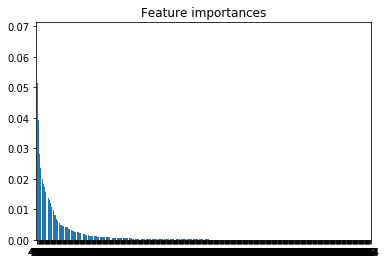

In [0]:
import matplotlib.pyplot as plt

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_f.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]), end =" ")
    print (train_features_sorted.columns[f])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_f.shape[1]), importances[indices])
plt.xticks(range(train_f.shape[1]), indices)
plt.xlim([-1, train_f.shape[1]])

plt.show()


In [0]:

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_f, test_f, train_l, test_l = train_test_split(train_features_sorted.values, train_labels.values, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

# Instantiate model
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False, max_iter=10000))),
  ('classification', MLPClassifier(308))
])
# Train the model on training data
clf.fit(train_f, train_l)

# Use the forest's predict method on the test data
predictions = clf.predict(test_f)
# Calculate the absolute errors
acc = f1_score(test_l, predictions, average='weighted')
# Print out the mean absolute error (mae)
print('F1 Score:', acc)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


F1 Score: 0.9991891861161399


In [0]:

# Import the model we are using
from sklearn.neural_network import MLPClassifier


# Instantiate model
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False, max_iter=5000))),
  ('classification', MLPClassifier(308))
])
# Train the model on training data
clf.fit(train_features_sorted, train_labels)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     loss='squared_hinge',
                                                     max_iter=5000,
                                                     multi_class='ovr',
                                                     penalty='l1',
                                                     random_state=None,
                                                     tol=0.0001, verbose=0),
                                 max_features=None, norm_order=1, prefit=False,
                                 threshold=None)),
                ('classification',
                 MLPCla...
                         